### Generate average plots from the 5x expt result files

# Hello world

1. This 
2. is
3. a
4. list

In [ ]:
%%bash ls

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import interpolate

import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
print(plt.style.available)
# Set global plot style to use academic writing format
plt.style.use('retro')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'bright', 'cjk-jp-font', 'cjk-kr-font', 'cjk-sc-font', 'cjk-tc-font', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'grid', 'high-contrast', 'high-vis', 'ieee', 'latex-sans', 'light', 'muted', 'nature', 'no-latex', 'notebook', 'pgf', 'retro', 'scatter', 'science', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'std-colors', 'tableau-colorblind10', 'vibrant']


## Read input files

Define a function that reads a given input and parses 

In [ ]:
N = 1

QRTM = "cartpole/qrtm/expt_csv/expts_20210731_110730.csv"
QRTM_PER = "cartpole/qrtm-PER/expt_csv/expts_20210728_224459.csv"
QRTM_IW = "cartpole/qrtm-iw/expt_csv/expts_20210731_110730.csv"
QRTM_IW_PER = "cartpole/qrtm-iw-PER/expt_csv/expts_20210731_110730.csv"

def parse_file(file):
    raw_dat = pd.read_csv(file)
    scores = raw_dat.filter(regex="^score", axis=1)
    errors = raw_dat.filter(regex="^td_", axis=1)

    scores = scores.groupby(scores.index // N).mean()
    scores['index'] = scores.index * N
    scores['avg'] = scores.loc[:, :].mean(axis=1)
    scores['max'] = scores.loc[:, :].max(axis=1)
    scores['min'] = scores.loc[:, :].min(axis=1)

    errors = errors.groupby(errors.index // N).mean()
    errors['index'] = errors.index * N
    errors['avg'] = errors.loc[:, :].mean(axis=1)
    errors['max'] = errors.loc[:, :].max(axis=1)
    errors['min'] = errors.loc[:, :].min(axis=1)

    # Running a check on max so the max score is <= 200
    scores.loc[(scores['max'] > 200), 'max'] = 200


    return scores, errors

qrtm_s, qrtm_e = parse_file(QRTM)
qrtm_per_s, qrtm_per_e = parse_file(QRTM_PER)
qrtm_iw_s, qrtm_iw_e = parse_file(QRTM_IW)
qrtm_iw_per_s, qrtm_iw_per_e = parse_file(QRTM_IW_PER)




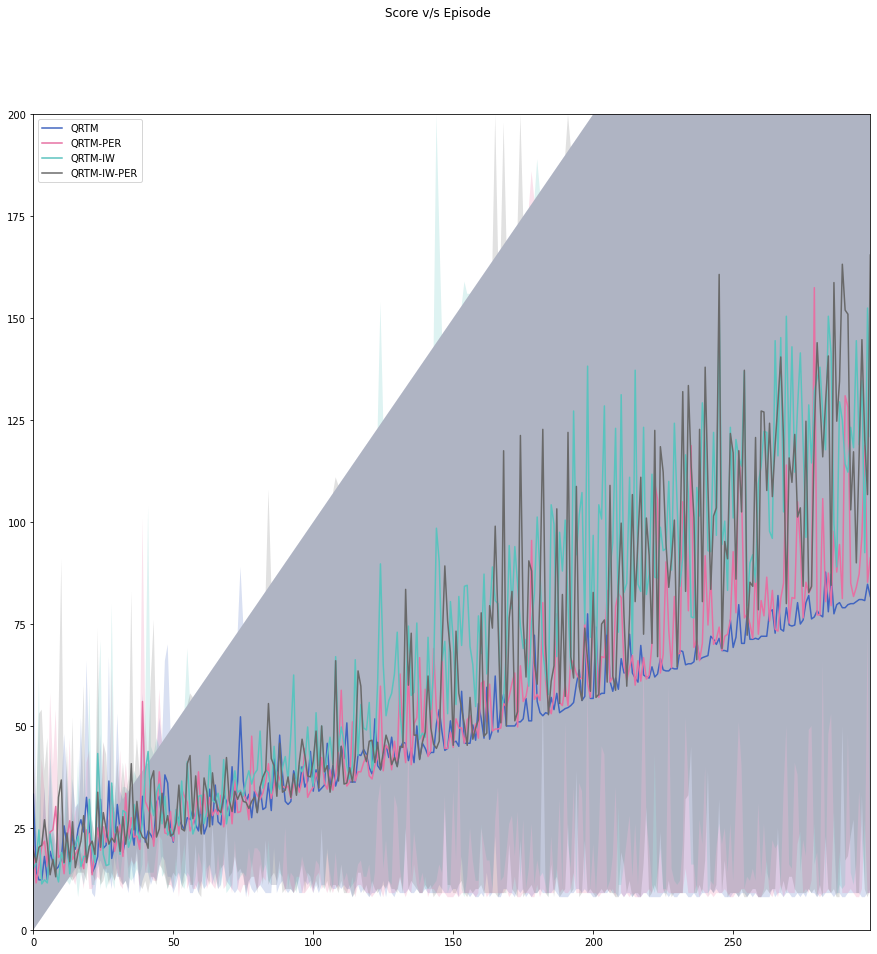

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
fig.suptitle("Score v/s Episode")
ax.plot(qrtm_s['index'], qrtm_s['avg'], label="QRTM")
ax.fill_between(qrtm_s['index'],qrtm_s['min'], qrtm_s['max'], alpha=0.2)
ax.plot(qrtm_per_s['index'], qrtm_per_s['avg'], label="QRTM-PER")
ax.fill_between(qrtm_per_s['index'],qrtm_per_s['min'], qrtm_per_s['max'], alpha=0.2)
ax.plot(qrtm_iw_s['index'], qrtm_iw_s['avg'], label="QRTM-IW")
ax.fill_between(qrtm_iw_s['index'],qrtm_iw_s['min'], qrtm_iw_s['max'], alpha=0.2)
ax.plot(qrtm_iw_per_s['index'], qrtm_iw_per_s['avg'], label="QRTM-IW-PER")
ax.fill_between(qrtm_iw_per_s['index'],qrtm_iw_per_s['min'], qrtm_iw_per_s['max'], alpha=0.2)
ax.legend(loc=2)
ax.autoscale(tight=True)

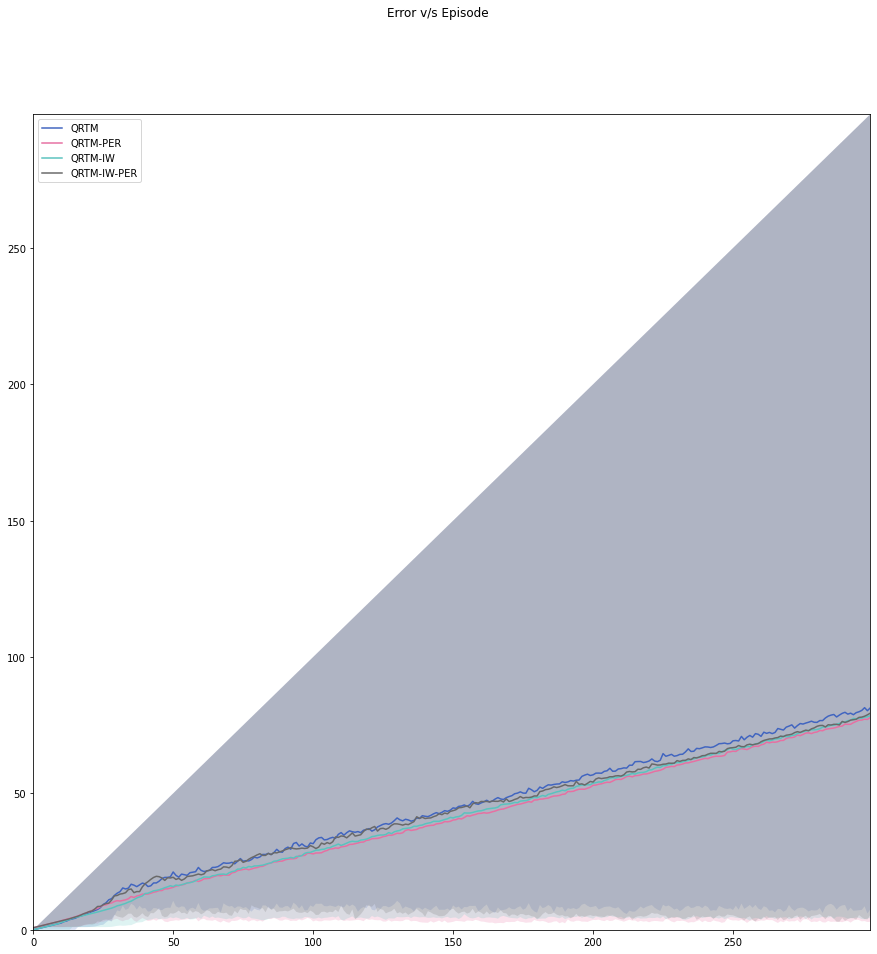

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
fig.suptitle("Error v/s Episode")
ax.plot(qrtm_e['index'], qrtm_e['avg'], label="QRTM")
ax.fill_between(qrtm_e['index'],qrtm_e['min'], qrtm_e['max'], alpha=0.2)
ax.plot(qrtm_per_e['index'], qrtm_per_e['avg'], label="QRTM-PER")
ax.fill_between(qrtm_per_e['index'],qrtm_per_e['min'], qrtm_per_e['max'], alpha=0.2)
ax.plot(qrtm_iw_e['index'], qrtm_iw_e['avg'], label="QRTM-IW")
ax.fill_between(qrtm_iw_e['index'],qrtm_iw_e['min'], qrtm_iw_e['max'], alpha=0.2)
ax.plot(qrtm_iw_per_e['index'], qrtm_iw_per_e['avg'], label="QRTM-IW-PER")
ax.fill_between(qrtm_iw_per_e['index'],qrtm_iw_per_e['min'], qrtm_iw_per_e['max'], alpha=0.2)
ax.legend(loc=2)
ax.autoscale(tight=True)

In [ ]:
MC_QRTM = "MountainCar/qrtm/expt_csv/expts_20211108_103243.csv"
# MC_QRTM_PER = "MountainCar/qrtm-PER/expt_csv/expts_20210728_224459.csv"
# MC_QRTM_IW = "MountainCar/qrtm-iw/expt_csv/expts_20210731_110730.csv"
# MC_QRTM_IW_PER = "MountainCar/qrtm-iw-PER/expt_csv/expts_20210731_110730.csv"


qrtm_s, qrtm_e = parse_file(MC_QRTM)
# qrtm_per_s, qrtm_per_e = parse_file(MC_QRTM_PER)
# qrtm_iw_s, qrtm_iw_e = parse_file(MC_QRTM_IW)
# qrtm_iw_per_s, qrtm_iw_per_e = parse_file(MC_QRTM_IW_PER)

fig, ax = plt.subplots(figsize=(15, 15))
fig.suptitle("Score v/s Episode")
ax.plot(qrtm_s['index'], qrtm_s['avg'], label="QRTM")
ax.fill_between(qrtm_s['index'],qrtm_s['min'], qrtm_s['max'], alpha=0.2)
# ax.plot(qrtm_per_s['index'], qrtm_per_s['avg'], label="QRTM-PER")
# ax.fill_between(qrtm_per_s['index'],qrtm_per_s['min'], qrtm_per_s['max'], alpha=0.2)
# ax.plot(qrtm_iw_s['index'], qrtm_iw_s['avg'], label="QRTM-IW")
# ax.fill_between(qrtm_iw_s['index'],qrtm_iw_s['min'], qrtm_iw_s['max'], alpha=0.2)
# ax.plot(qrtm_iw_per_s['index'], qrtm_iw_per_s['avg'], label="QRTM-IW-PER")
# ax.fill_between(qrtm_iw_per_s['index'],qrtm_iw_per_s['min'], qrtm_iw_per_s['max'], alpha=0.2)
ax.legend(loc=2)
ax.autoscale(tight=True)